In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/diamond-price-prediction/train.csv",index_col=0)
df.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
26743,0.70,Premium,E,SI1,60.7,58.0,2703,5.74,5.73,3.48
33959,0.38,Ideal,E,VS2,61.9,57.0,963,4.66,4.61,2.87
10047,0.37,Ideal,I,VVS2,61.9,54.0,632,4.62,4.66,2.87


## **EDA**
#### Analyzing the data and doing visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

df = df.drop(df[df["carat"] == 0].index)
df = df.drop(df[df["depth"] == 0].index)
df = df.drop(df[df["table"] == 0].index)
df = df.drop(df[df["price"] == 0].index)

df.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
15114,1.02,Premium,J,SI2,62.6,60.0,3599,6.42,6.39,4.01
23369,0.73,Premium,H,SI2,62.5,58.0,2234,5.73,5.69,3.57
38875,0.32,Very Good,I,VS1,63.1,56.0,648,4.40,4.38,2.77


In [7]:
# adding new features

df["total_depth"] = (df["z"]*2)/(df["x"]+df["y"])

df["size"] = df["x"] * df["y"] * df["z"]
df = df.drop(["x","y","z"],axis=1)

df.sample(5)

,carat,cut,color,clarity,depth,table,price,total_depth,size
Id,,,,,,,,,
23323,0.31,Ideal,E,VS1,60.2,56.0,804,0.602492,51.847656
34177,0.23,Good,E,VS1,64.3,59.0,373,0.643320,36.854784
32404,1.01,Good,E,SI1,58.1,59.0,5627,0.580938,167.771520
5019,1.06,Premium,G,SI1,59.6,58.0,4815,0.595522,179.107509
30111,0.30,Premium,E,SI1,62.5,59.0,526,0.624709,49.322720


In [8]:
cols = ["cut","color","clarity"]
for i in cols:
    print(df[i].value_counts())
    print("=============================")

Ideal        17201
Premium      11103
Very Good     9657
Good          3878
Fair          1296
Name: cut, dtype: int64
G    9053
E    7832
F    7630
H    6645
D    5421
I    4264
J    2290
Name: color, dtype: int64
SI1     10426
VS2      9821
SI2      7424
VS1      6474
VVS2     4041
VVS1     2904
IF       1442
I1        603
Name: clarity, dtype: int64


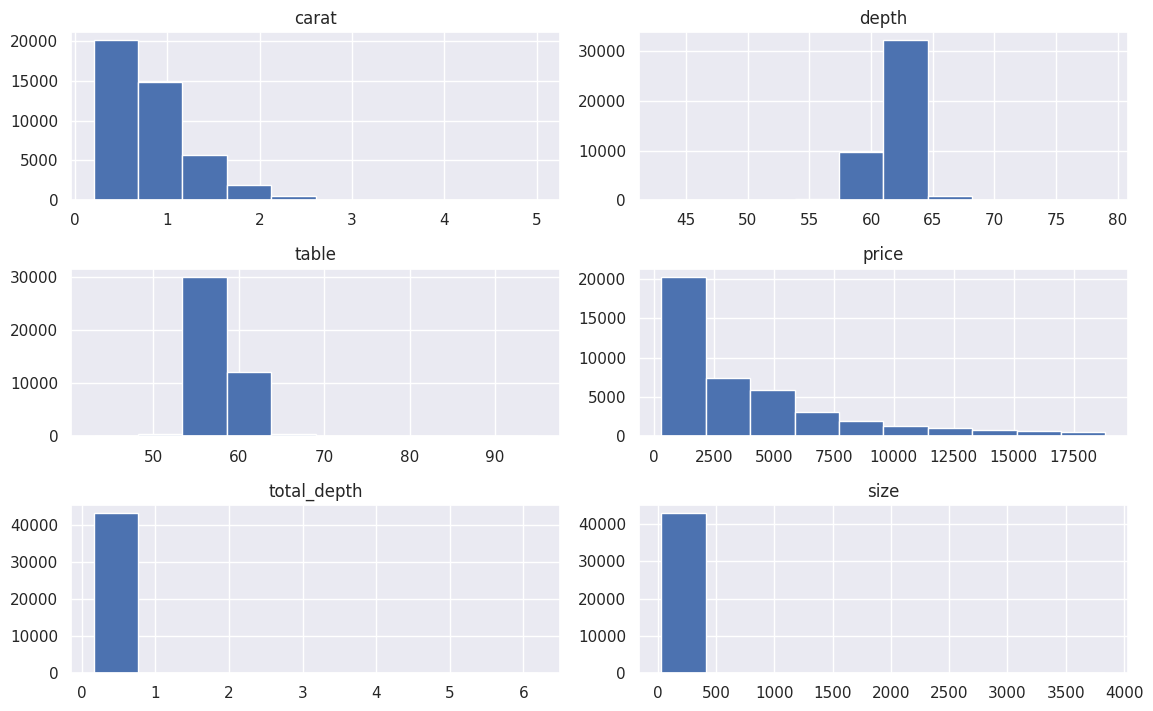

In [9]:
sns.set(rc={'figure.figsize':(11.7,7.27)})
df.hist()
plt.tight_layout()
plt.show()

# carat values are normal
# depth values the majority of the data is less than 65 
# table values are normal
# price values are normal
# total depth values are centered in a specific range 
# size values are centered in a specific range 

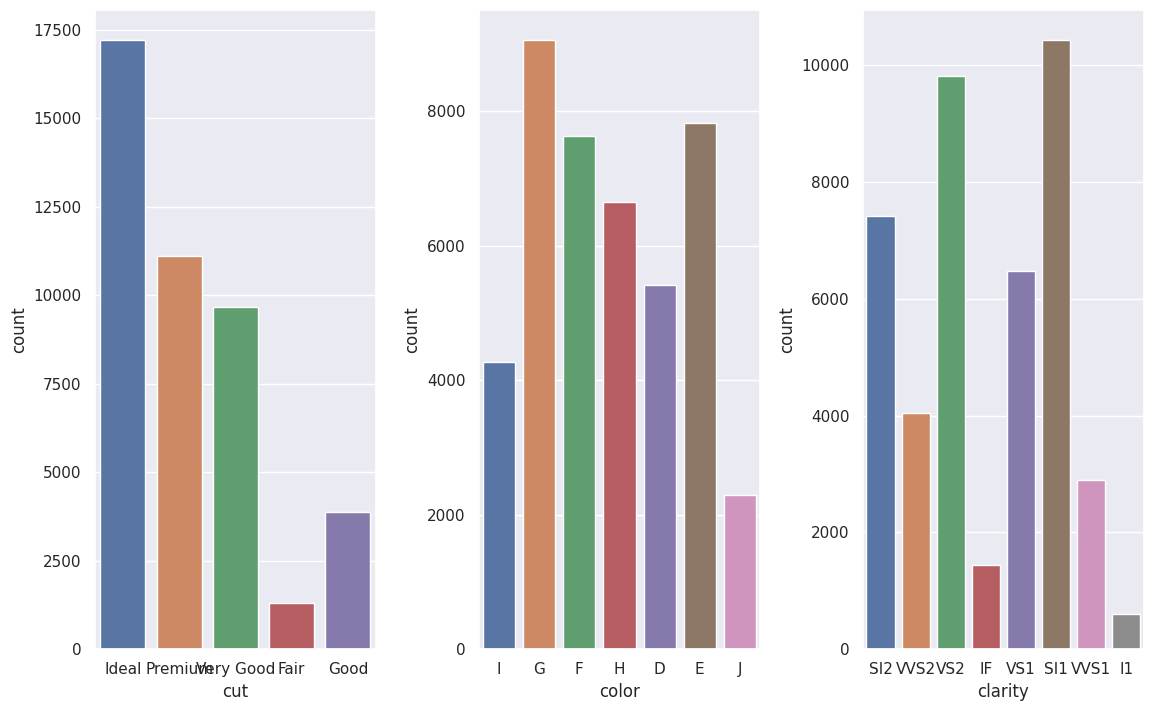

In [10]:
plt.subplot(1,3,1)
sns.countplot(data=df,x="cut")

plt.subplot(1,3,2)
sns.countplot(data=df,x="color")

plt.subplot(1,3,3)
sns.countplot(data=df,x="clarity")

plt.tight_layout()
plt.show()

# cut : only few rows with the Fair value  
# color : categories are normally distributed
# clarity : only few rows with IF, l1 values

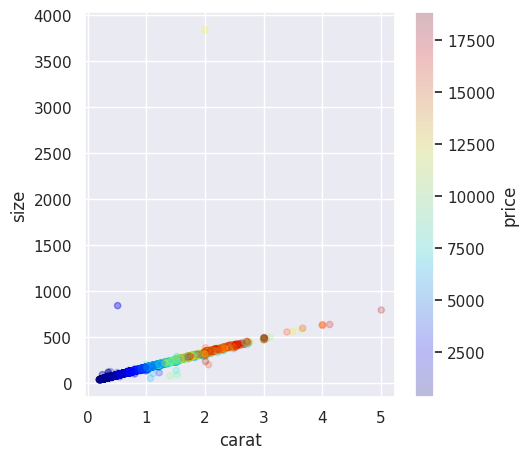

In [11]:
df.plot(kind="scatter", x="carat", y="size", c="price",alpha=0.2,colorbar=True,cmap = plt.get_cmap('jet'),figsize=(5,5))
plt.show()

# whenever the carat increases the size and the price also increase

<AxesSubplot: >

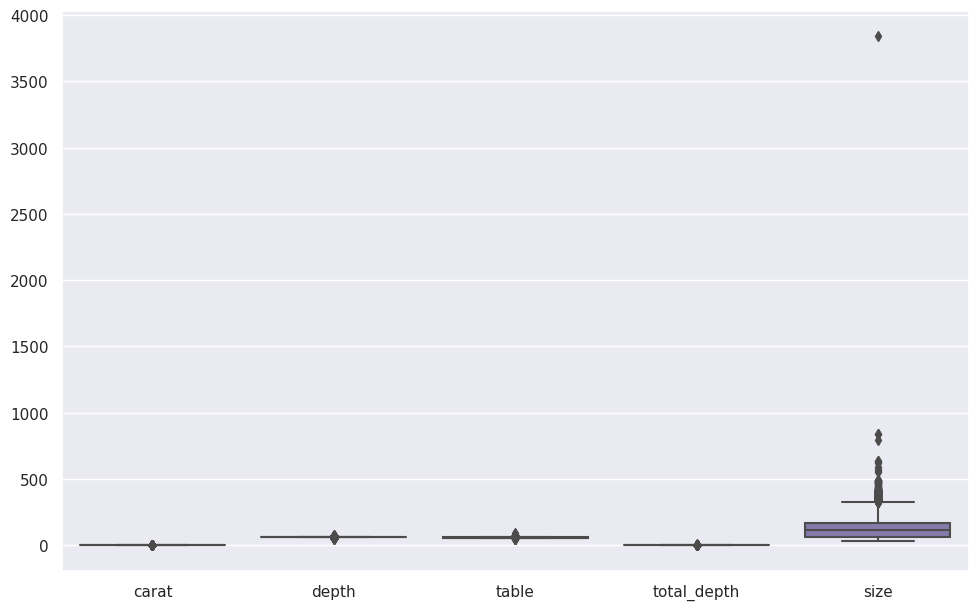

In [12]:
sns.boxplot(data = df[["carat","depth","table",'total_depth','size']])

# dataset is full of outliers

In [13]:
# handling outliers
cols = ['carat', 'depth','table','total_depth','size'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~(( df[cols] < (Q1 - 1.5 * IQR)) |( df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## **Preprocessing**
#### Using the oridnal encoder because some values are better than the others.

In [14]:
encoder_cut = OrdinalEncoder(categories=[["Fair","Good","Very Good","Premium","Ideal"]], handle_unknown='use_encoded_value', unknown_value = 100).fit(df[["cut"]])
encoded_cut = encoder_cut.transform(df[["cut"]])

encoder_color = OrdinalEncoder(categories=[["J","I","H","G","F","E","D"]],  handle_unknown='use_encoded_value', unknown_value = 100).fit(df[["color"]])
encoded_color = encoder_color.transform(df[["color"]])

encoder_clarity = OrdinalEncoder(categories=[["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]],  handle_unknown='use_encoded_value', unknown_value = 100).fit(df[["clarity"]])
encoded_clarity = encoder_clarity.transform(df[["clarity"]])

df["cut"] = encoded_cut
df["color"] = encoded_color
df["clarity"] = encoded_clarity

df[['cut','color','clarity']] = df[['cut','color','clarity']].replace(100, 0)

In [15]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,total_depth,size
Id,,,,,,,,,
5731,1.21,3.0,1.0,1.0,59.9,61.0,4337,0.598253,193.977615
17298,1.03,2.0,1.0,1.0,63.5,58.0,5884,0.635368,165.777920
9915,0.71,1.0,3.0,3.0,58.9,61.0,2649,0.588841,116.381272


In [16]:
# specifying the features and the target

X = df.drop("price",axis=1)
y = df["price"]

In [17]:
# splitting the data for training the model and evaluating it's perfromance

X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_validation.shape)

(31433, 8)
(7859, 8)


In [18]:
# scaling the data to make it in the same range

scaler = StandardScaler().fit(X_train[["carat","depth","table","total_depth","size"]])
scaled_train = scaler.transform(X_train[["carat","depth","table","total_depth","size"]])

# the MinMax Scaler didn't give a better results than the standard scaler

# scaler = MinMaxScaler().fit(X_train[["carat","depth","table","total_depth","size"]])
# scaled_train = scaler.transform(X_train[["carat","depth","table","total_depth","size"]])

X_train[["carat","depth","table","total_depth","size"]] = scaled_train

In [19]:
scaled_validation = scaler.transform(X_validation[["carat","depth","table","total_depth","size"]])
X_validation[["carat","depth","table","total_depth","size"]] = scaled_validation

## **Model Training**

In [20]:
# Ridge
r1 = Ridge(random_state=0)
r1.fit(X_train,y_train)
pred_r1 = r1.predict(X_validation)

# Lasso
l1 = Lasso(random_state=0)
l1.fit(X_train,y_train)
pred_l1 = l1.predict(X_validation)

# Random Forest Regressor
randomForest1 = RandomForestRegressor(random_state=0)
randomForest1.fit(X_train,y_train)
pred_rf1 = randomForest1.predict(X_validation)

# KNN
knn1 = KNeighborsRegressor()
knn1.fit(X_train,y_train)
pred_knn1 = knn1.predict(X_validation)

In [21]:
rmse_r1 = np.sqrt(mean_squared_error(y_validation, pred_r1))
rmse_l1 = np.sqrt(mean_squared_error(y_validation, pred_l1))
rmse_rfr1 = np.sqrt(mean_squared_error(y_validation, pred_rf1))
rmse_knn1 = np.sqrt(mean_squared_error(y_validation, pred_knn1))

###########################################################

print("Ridge rmse ",np.round(rmse_r1,2))
print("Lasso rmse ",np.round(rmse_l1,2))
print("RandomForestRegressor rmse ",np.round(rmse_rfr1,2))
print("KNN rmse ",np.round(rmse_knn1,2))

Ridge rmse  1139.13
Lasso rmse  1138.65
RandomForestRegressor rmse  438.2
KNN rmse  649.83


## **GridScearchCV For The Models With The Best Performance**
##### **RandomForestRegressor**
##### **KNN**

In [22]:
rfr = RandomForestRegressor(random_state=0)
knn = KNeighborsRegressor(weights="distance",algorithm="brute")

# parameters
n_estimators = [15,25,50,75,100,125]
criterion = ["squared_error"]

In [23]:
knn.fit(X_train,y_train)
pred1 = knn.predict(X_validation)
knn_rmse = np.sqrt(mean_squared_error(y_validation,pred1))

print("KNN rmse (after tuning): ",np.round(knn_rmse,2))


################################################################

params = {"n_estimators":n_estimators, "criterion":criterion}
rfr_gridSearch = GridSearchCV(rfr, params, cv=5)

rfr_gridSearch.fit(X_train,y_train)
pred2 = rfr_gridSearch.predict(X_validation)
rfr_rmse = np.sqrt(mean_squared_error(y_validation,pred2))
print("RandomForestRegressor rmse (after tuning): ",np.round(rfr_rmse,2))

KNN rmse (after tuning):  614.72
RandomForestRegressor rmse (after tuning):  437.94


In [24]:
print("Best Hyperparameters (RandomForestRegressor) {}, \nwith {} rmse".format(rfr_gridSearch.best_params_, np.round(rfr_rmse,2)))
print("=====================================")
print("Best Hyperparameters (KNN) {}, \nwith {} rmse ".format(knn.get_params, np.round(knn_rmse,2)))

Best Hyperparameters (RandomForestRegressor) {'criterion': 'squared_error', 'n_estimators': 125}, 
with 437.94 rmse
Best Hyperparameters (KNN) <bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='brute', weights='distance')>, 
with 614.72 rmse 


## **The Best Model :** 
#### **RandomForestRegressor (with tuning)**

In [25]:
final_model = rfr_gridSearch

## **Testing The Model**

In [26]:
test_df = pd.read_csv("/kaggle/input/diamond-price-prediction/test.csv")

#### **Preprocessing The Test Set**

In [27]:
test_df["cut"] = encoder_cut.transform(test_df[["cut"]])
test_df["color"] = encoder_color.transform(test_df[["color"]])
test_df["clarity"] = encoder_clarity.transform(test_df[["clarity"]])
test_df[['cut','color','clarity']] = test_df[['cut','color','clarity']].replace(100, 0)

#############################################################

test_df["total_depth"] = (test_df["z"]*2)/(test_df["x"]+test_df["y"])
test_df["size"] = test_df["x"] * test_df["y"] * test_df["z"]
test_df = test_df.drop(["x","y","z"],axis=1)
test_df = test_df.fillna(0)

##############################################################

test_df[["carat","depth","table","total_depth","size"]] = scaler.transform(test_df[["carat","depth","table","total_depth","size"]])

## **Output**

In [28]:
idd = test_df["Id"].values
test_set = test_df.drop(["Id"], axis=1)

preds = final_model.predict(test_set)

preds_df = pd.DataFrame({"id":idd, "price":preds})
preds_csv = preds_df.to_csv('predictions.csv', index = False)